# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random

# Import API key
# from config import api_key
api_key = "a84dcbadfd194c157bcf149e7b57caf6"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

In [3]:
cities[5]  # testing what the cities list looks like (can change the index to see other cities)

'kondapalle'

In [4]:
city = cities[27] #created a city variable to test, this will be part of the for loop below
print(city)

bethel


In [5]:
query_url = 'http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&APPID={api_key}'.format(city=city, api_key=api_key)

In [6]:
print(query_url)

http://api.openweathermap.org/data/2.5/weather?q=bethel&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6


In [7]:
weather_response = requests.get(query_url) #send request and assign return value to variable

In [8]:
weather_response.ok #check if response was successful 

True

In [9]:
weather_json = weather_response.json()  #convert response to json

In [10]:
weather_json  

{'coord': {'lon': -161.76, 'lat': 60.79},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 28.8,
  'pressure': 989,
  'humidity': 68,
  'temp_min': 24.8,
  'temp_max': 30.2},
 'visibility': 16093,
 'wind': {'speed': 9.17, 'deg': 360},
 'clouds': {'all': 90},
 'dt': 1554627360,
 'sys': {'type': 1,
  'id': 7640,
  'message': 0.0054,
  'country': 'US',
  'sunrise': 1554652317,
  'sunset': 1554702356},
 'id': 5880568,
 'name': 'Bethel',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
data = []
record_count = 1 
row_index = 0
set_count = 1

print("Beginning Data Retrieval\n"
      "-----------------------------"
        )
for city in cities:  
    query_url = 'http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&APPID={api_key}'.format(city=city, api_key=api_key)
    weather_response = requests.get(query_url)
    weather_json = weather_response.json() 
    
    if weather_json["cod"] == "404":
        print("City is not found, so skipping..") 
        
    else:     
         city_data = {
        'city': city,
        'city_number': weather_json['id'],
        'latitude': weather_json['coord']['lat'],
        'longitude': weather_json['coord']['lon'],
        'temperature': weather_json['main']['temp'],
        'humidity': weather_json['main']['humidity'],
        'cloudiness': weather_json['clouds']['all'],
        'wind_speed': weather_json['wind']['speed']
    }
    data.append(city_data)
    print("------------------------")
    print("Processing Record", record_count, "of Set", set_count, "|", city) 
    print(query_url) 
    set_count += 1 
    

Beginning Data Retrieval
-----------------------------
------------------------
Processing Record 1 of Set 1 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?q=puerto ayora&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 2 | port alfred
http://api.openweathermap.org/data/2.5/weather?q=port alfred&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 3 | marion
http://api.openweathermap.org/data/2.5/weather?q=marion&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 4 | jamestown
http://api.openweathermap.org/data/2.5/weather?q=jamestown&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 5 | buala
http://api.openweathermap.org/data/2.5/weather?q=buala&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 6 

------------------------
Processing Record 1 of Set 47 | avarua
http://api.openweathermap.org/data/2.5/weather?q=avarua&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
City is not found, so skipping..
------------------------
Processing Record 1 of Set 48 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?q=attawapiskat&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 49 | rio grande
http://api.openweathermap.org/data/2.5/weather?q=rio grande&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 50 | portland
http://api.openweathermap.org/data/2.5/weather?q=portland&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 51 | cape town
http://api.openweathermap.org/data/2.5/weather?q=cape town&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 52 | rikitea
ht

------------------------
Processing Record 1 of Set 93 | libourne
http://api.openweathermap.org/data/2.5/weather?q=libourne&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 94 | tiksi
http://api.openweathermap.org/data/2.5/weather?q=tiksi&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 95 | constitucion
http://api.openweathermap.org/data/2.5/weather?q=constitucion&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 96 | makakilo city
http://api.openweathermap.org/data/2.5/weather?q=makakilo city&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 97 | sao pedro da cova
http://api.openweathermap.org/data/2.5/weather?q=sao pedro da cova&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 98 | terrace
http://api.open

------------------------
Processing Record 1 of Set 139 | thinadhoo
http://api.openweathermap.org/data/2.5/weather?q=thinadhoo&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 140 | gamba
http://api.openweathermap.org/data/2.5/weather?q=gamba&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 141 | cap malheureux
http://api.openweathermap.org/data/2.5/weather?q=cap malheureux&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 142 | giyani
http://api.openweathermap.org/data/2.5/weather?q=giyani&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 143 | alice springs
http://api.openweathermap.org/data/2.5/weather?q=alice springs&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
City is not found, so skipping..
------------------------
Processing Record 1 of Set 144 | 

------------------------
Processing Record 1 of Set 184 | buritizeiro
http://api.openweathermap.org/data/2.5/weather?q=buritizeiro&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 185 | provideniya
http://api.openweathermap.org/data/2.5/weather?q=provideniya&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 186 | marquette
http://api.openweathermap.org/data/2.5/weather?q=marquette&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 187 | labelle
http://api.openweathermap.org/data/2.5/weather?q=labelle&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 188 | nishihara
http://api.openweathermap.org/data/2.5/weather?q=nishihara&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 189 | nauta
http://api.openweathermap.o

------------------------
Processing Record 1 of Set 229 | san ciro de acosta
http://api.openweathermap.org/data/2.5/weather?q=san ciro de acosta&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 230 | coihaique
http://api.openweathermap.org/data/2.5/weather?q=coihaique&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 231 | karasjok
http://api.openweathermap.org/data/2.5/weather?q=karasjok&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 232 | kuching
http://api.openweathermap.org/data/2.5/weather?q=kuching&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 233 | bilma
http://api.openweathermap.org/data/2.5/weather?q=bilma&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 234 | talnakh
http://api.openweathermap

------------------------
Processing Record 1 of Set 274 | abnub
http://api.openweathermap.org/data/2.5/weather?q=abnub&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 275 | marandahalli
http://api.openweathermap.org/data/2.5/weather?q=marandahalli&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 276 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?q=bambous virieux&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
City is not found, so skipping..
------------------------
Processing Record 1 of Set 277 | meyungs
http://api.openweathermap.org/data/2.5/weather?q=meyungs&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 278 | tadine
http://api.openweathermap.org/data/2.5/weather?q=tadine&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 279 | acaj

------------------------
Processing Record 1 of Set 319 | port-gentil
http://api.openweathermap.org/data/2.5/weather?q=port-gentil&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 320 | college
http://api.openweathermap.org/data/2.5/weather?q=college&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 321 | farkhor
http://api.openweathermap.org/data/2.5/weather?q=farkhor&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 322 | yerbogachen
http://api.openweathermap.org/data/2.5/weather?q=yerbogachen&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 323 | puerto ayacucho
http://api.openweathermap.org/data/2.5/weather?q=puerto ayacucho&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 324 | pangkah
http://api.openwe

------------------------
Processing Record 1 of Set 364 | burgeo
http://api.openweathermap.org/data/2.5/weather?q=burgeo&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 365 | matara
http://api.openweathermap.org/data/2.5/weather?q=matara&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 366 | basar
http://api.openweathermap.org/data/2.5/weather?q=basar&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 367 | clyde river
http://api.openweathermap.org/data/2.5/weather?q=clyde river&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 368 | egvekinot
http://api.openweathermap.org/data/2.5/weather?q=egvekinot&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 369 | nahrin
http://api.openweathermap.org/data/2.5/weather

------------------------
Processing Record 1 of Set 410 | kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?q=kudahuvadhoo&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 411 | ust-ishim
http://api.openweathermap.org/data/2.5/weather?q=ust-ishim&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 412 | villarrica
http://api.openweathermap.org/data/2.5/weather?q=villarrica&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
City is not found, so skipping..
------------------------
Processing Record 1 of Set 413 | bababe
http://api.openweathermap.org/data/2.5/weather?q=bababe&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 414 | columbia
http://api.openweathermap.org/data/2.5/weather?q=columbia&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 415 | adra

------------------------
Processing Record 1 of Set 455 | kloulklubed
http://api.openweathermap.org/data/2.5/weather?q=kloulklubed&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 456 | longkou
http://api.openweathermap.org/data/2.5/weather?q=longkou&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
City is not found, so skipping..
------------------------
Processing Record 1 of Set 457 | aflu
http://api.openweathermap.org/data/2.5/weather?q=aflu&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 458 | terney
http://api.openweathermap.org/data/2.5/weather?q=terney&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 459 | malanje
http://api.openweathermap.org/data/2.5/weather?q=malanje&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 460 | chekalin
http://api.open

------------------------
Processing Record 1 of Set 500 | tateyama
http://api.openweathermap.org/data/2.5/weather?q=tateyama&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 501 | opuwo
http://api.openweathermap.org/data/2.5/weather?q=opuwo&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
City is not found, so skipping..
------------------------
Processing Record 1 of Set 502 | korla
http://api.openweathermap.org/data/2.5/weather?q=korla&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 503 | taltal
http://api.openweathermap.org/data/2.5/weather?q=taltal&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 504 | lompoc
http://api.openweathermap.org/data/2.5/weather?q=lompoc&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 505 | hofn
http://api.openweathermap.org

------------------------
Processing Record 1 of Set 545 | lebedyn
http://api.openweathermap.org/data/2.5/weather?q=lebedyn&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 546 | cradock
http://api.openweathermap.org/data/2.5/weather?q=cradock&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 547 | balabac
http://api.openweathermap.org/data/2.5/weather?q=balabac&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 548 | valleyview
http://api.openweathermap.org/data/2.5/weather?q=valleyview&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 549 | sioux lookout
http://api.openweathermap.org/data/2.5/weather?q=sioux lookout&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 550 | genhe
http://api.openweathermap.org/dat

------------------------
Processing Record 1 of Set 591 | itarema
http://api.openweathermap.org/data/2.5/weather?q=itarema&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 592 | dire dawa
http://api.openweathermap.org/data/2.5/weather?q=dire dawa&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 593 | nizhneudinsk
http://api.openweathermap.org/data/2.5/weather?q=nizhneudinsk&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 594 | piopio
http://api.openweathermap.org/data/2.5/weather?q=piopio&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 595 | the pas
http://api.openweathermap.org/data/2.5/weather?q=the pas&units=imperial&APPID=a84dcbadfd194c157bcf149e7b57caf6
------------------------
Processing Record 1 of Set 596 | sobolevo
http://api.openweathermap.org/data/2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
#Saved dataset
df.to_csv(path_or_buf='cities.csv') 

In [20]:
#Display a random set of 500 cities
df = pd.DataFrame(data)  #create a dataframe from the data list created
df.head() 


,city,city_number,cloudiness,humidity,latitude,longitude,temperature,wind_speed
0,puerto ayora,3652764,44,100,-0.74,-90.35,77.27,7.09
1,port alfred,964432,0,80,-33.59,26.89,71.01,8.01
2,marion,4120524,90,100,35.21,-90.20,62.80,6.76
3,jamestown,2069194,0,40,-33.21,138.60,67.82,12.68
4,buala,2109528,76,100,-8.15,159.59,78.71,2.17


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

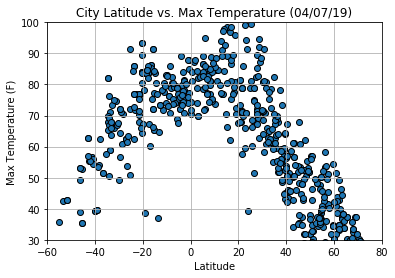

In [14]:
plt.scatter(df["latitude"], df["temperature"], marker="o", edgecolors="black") 

# Create a title, x label, and y label the chart
plt.title("City Latitude vs. Max Temperature (04/07/19)") 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.xlim(-60, 80)
plt.ylim(30, 100) 
plt.savefig("lat_temp.png") 

            

#### Latitude vs. Humidity Plot

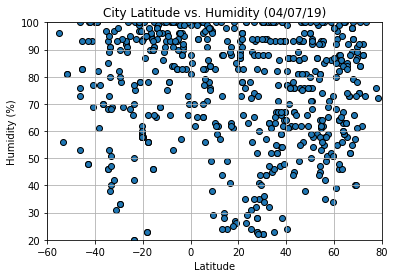

In [15]:
plt.scatter(df["latitude"], df["humidity"], marker="o", edgecolors="black", ) 

# Create a title, x label, and y label the chart
plt.title("City Latitude vs. Humidity (04/07/19)") 
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)") 
plt.grid(True) 
plt.xlim(-60, 80)
plt.ylim(20, 100) 
plt.savefig("lat_hum.png") 

#### Latitude vs. Cloudiness Plot

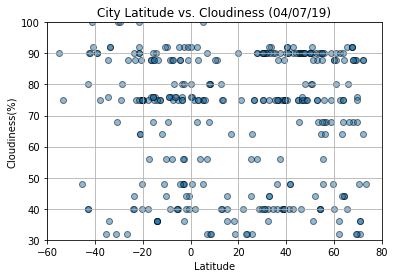

In [17]:
plt.scatter(df["latitude"], df["cloudiness"], marker="o", edgecolors="black", alpha= 0.50) 

# Create a title, x label, and y label the chart
plt.title("City Latitude vs. Cloudiness (04/07/19)") 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)
plt.xlim(-60, 80)
plt.ylim(30, 100)
plt.savefig("lat_cloud.png")  

#### Latitude vs. Wind Speed Plot

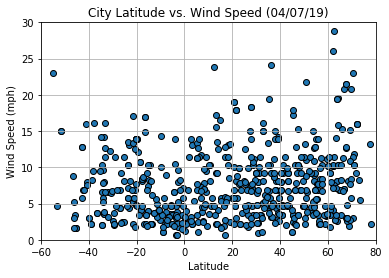

In [18]:
plt.scatter(df["latitude"], df["wind_speed"], marker="o", edgecolors="black") 

# Create a title, x label, and y label the chart
plt.title("City Latitude vs. Wind Speed (04/07/19)") 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.xlim(-60, 80)
plt.ylim(0, 30) 
plt.savefig("lat_wind.png") 